In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\hearth desese\\train.csv")
test_df=pd.read_csv("D:\\machine learning projecsts folders\\hearth desese\\test.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
train_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [6]:
train_df.isnull().sum()


id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
train_df.shape


(630000, 15)

In [8]:
train_df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [9]:
for i in train_df.columns.drop('id'):
    print("*"*50)
    print("unique value are ")
    print(train_df[i].value_counts())

**************************************************
unique value are 
Age
54    46826
58    41714
51    37526
57    32442
59    31713
52    30572
60    29437
62    25872
44    25476
41    24633
42    21958
56    21149
64    20109
67    17832
65    17454
50    16659
48    16282
46    16246
43    16231
53    15663
45    14629
61    13826
63    13184
66    11771
55    11424
49    10643
47     6888
70     5950
39     5540
71     4556
40     4554
69     4018
35     3991
68     3849
34     2623
37     2481
29     1048
38      931
76      798
77      760
74      741
75        1
Name: count, dtype: int64
**************************************************
unique value are 
Sex
1    450283
0    179717
Name: count, dtype: int64
**************************************************
unique value are 
Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64
**************************************************
unique value are 
BP
120    116574
130    106259
140     99775
1

> # EDA

>@ AGE

In [10]:
train_df['Age'].isnull().sum()

np.int64(0)

In [11]:
train_df['Age'].describe()

count    630000.000000
mean         54.136706
std           8.256301
min          29.000000
25%          48.000000
50%          54.000000
75%          60.000000
max          77.000000
Name: Age, dtype: float64

In [12]:
print(train_df['Age'].std())
print(train_df['Age'].kurt())

8.256300848556231
-0.5701570478312692


<Axes: xlabel='Age', ylabel='Count'>

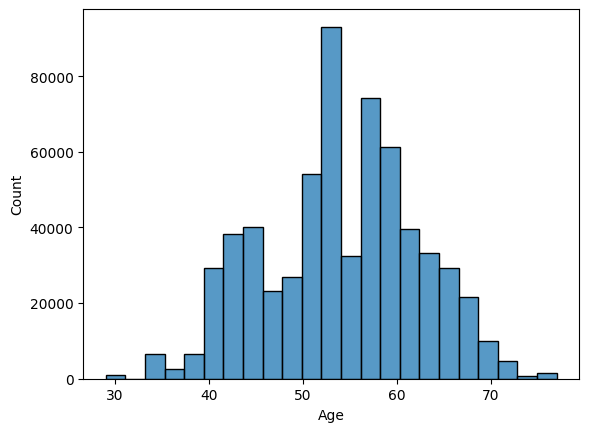

In [13]:
sns.histplot(train_df['Age'],bins=23)

<Axes: xlabel='Age'>

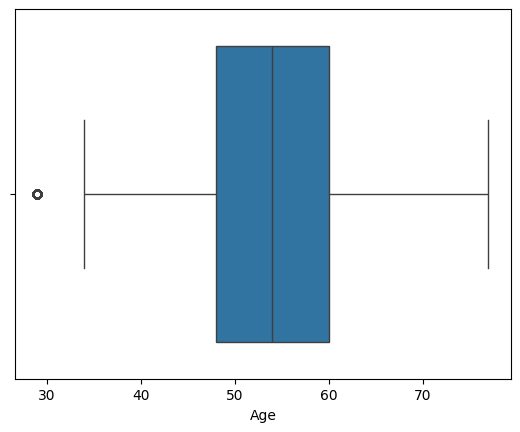

In [14]:
sns.boxplot(x=train_df['Age'])

In [15]:
train_df[train_df['Age']==29]['Heart Disease'].value_counts()

Heart Disease
Absence     774
Presence    274
Name: count, dtype: int64

# observation 
1. the mean of the data is 54 and the median of the data is also 54 {good}
2. the min value of  the data is 29 -
3. the iqr range of the data lies betwwneen 48-60
4. the age 54 is the most occuringin the data 
5. the box plot of the data 29 is out of wishker range in the lower bound  of the data

In [16]:
train_df.sample(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
33499,33499,57,1,4,150,273,0,0,106,1,1.0,3,0,7,Presence
42826,42826,41,1,3,120,172,0,2,168,0,0.0,1,0,3,Absence
627129,627129,56,1,3,120,258,0,2,125,0,0.0,1,1,3,Absence
373715,373715,41,1,4,112,282,0,0,140,1,0.0,1,0,7,Presence


> # sex

In [17]:
train_df['Sex'].value_counts()

Sex
1    450283
0    179717
Name: count, dtype: int64

<Axes: xlabel='Sex'>

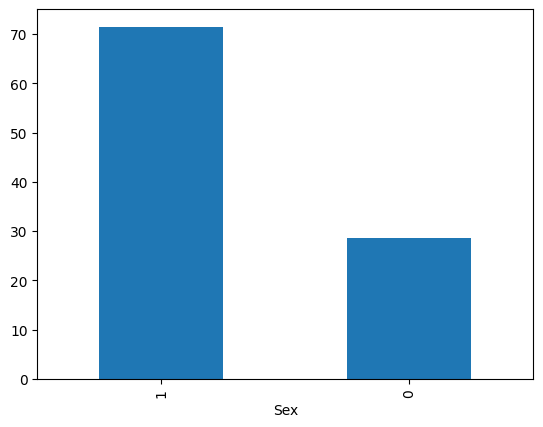

In [18]:
(train_df['Sex'].value_counts(normalize=True)*100).plot(kind='bar')

observation:
1. the data given is uneven the value of 1(asa male ) is more as compare to female 
2. the male covers almost 70 percent of the data 

In [19]:
train_df.sample(3)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
149015,149015,52,1,2,120,248,1,2,150,0,0.0,1,0,3,Absence
163500,163500,46,1,4,150,254,0,0,179,0,1.6,1,0,3,Absence
123244,123244,65,1,4,142,282,0,0,138,0,1.8,2,2,7,Presence


> # chest pain type 

In [20]:
train_df['Chest pain type'].value_counts()

Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64

<Axes: xlabel='Chest pain type'>

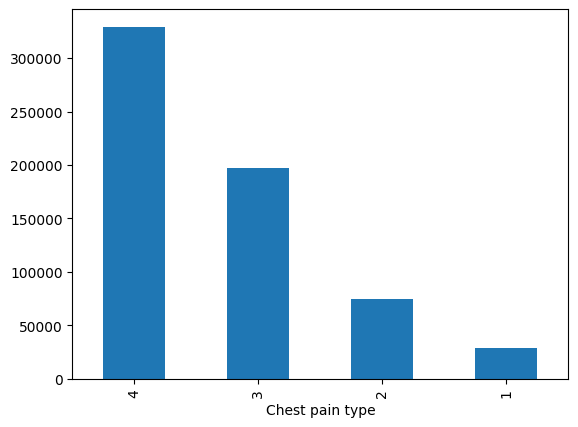

In [21]:
(train_df['Chest pain type'].value_counts()).plot(kind='bar')

observation
1. there are more data avalable for 4 type 
2. the least type of pain is 1 
in this pain the 1,2,3,4 is 
<🔹 1. = Typical angina
🔹 2. = Atypical angina
🔹 3. = Non-anginal pain
🔹 4. = Asymptomatic

In [22]:
train_df.sample(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
248201,248201,51,1,4,112,206,0,0,149,0,0.0,1,0,3,Absence
606388,606388,67,1,3,160,258,0,0,152,0,0.6,1,0,3,Absence
277424,277424,64,0,3,128,303,0,2,172,0,0.0,2,1,3,Absence
595478,595478,65,1,4,140,244,0,2,162,1,0.0,2,0,3,Presence


> # BP

In [23]:
train_df['BP'].describe()

count    630000.000000
mean        130.497433
std          14.975802
min          94.000000
25%         120.000000
50%         130.000000
75%         140.000000
max         200.000000
Name: BP, dtype: float64

In [24]:
train_df['BP'].value_counts()

BP
120    116574
130    106259
140     99775
150     44272
110     42639
160     24133
125     20480
112     18905
128     18559
138     18523
118     12128
132     11669
108      9853
135      9264
145      8156
124      7046
100      5914
134      5568
152      4828
180      4269
105      4134
126      3873
122      3773
115      3738
136      3640
142      3603
178      1982
170      1944
102      1754
94       1711
174       780
144       728
146       684
172       679
101       674
104       665
106       651
200       646
165       632
192       615
158       599
155       587
117       577
156       552
129       507
123       502
148       493
154       108
111        81
114        52
175        39
109        36
141        28
168        21
103        19
149        17
127        13
131        12
116        11
133         9
147         8
162         3
99          3
96          1
95          1
184         1
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

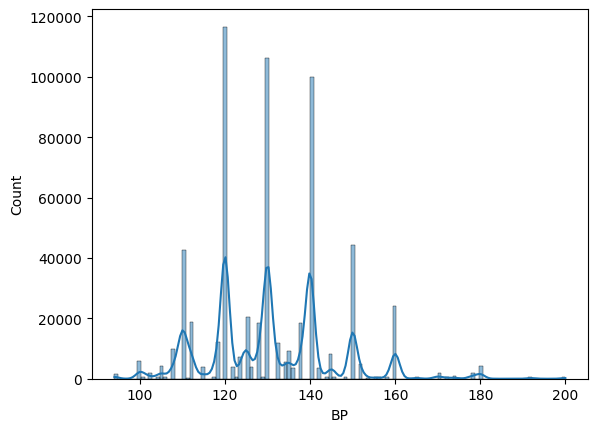

In [25]:
sns.histplot(train_df['BP'],kde=True,bins=120)

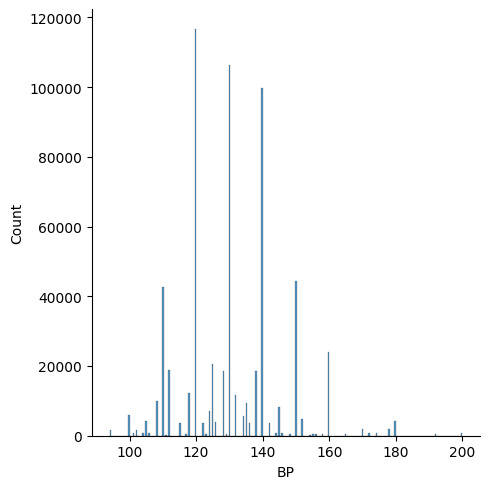

In [26]:
sns.displot(train_df['BP'])

<Axes: ylabel='BP'>

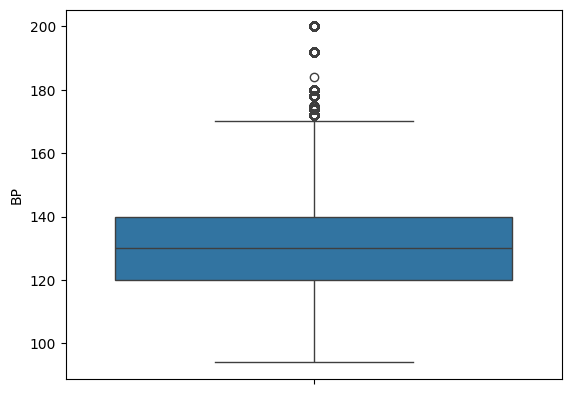

In [27]:
sns.boxplot(train_df['BP'])

In [28]:
train_df[train_df['BP']>180]['Heart Disease'].value_counts()

Heart Disease
Absence     769
Presence    493
Name: count, dtype: int64

OBSERVATION:
1. THE MEAN OF THE DATA IS 130 as wel as the median 
2. the iqr range lies between 120 to 140
3. the are some point above the wishker of the box plot which can be considers as the outliers 
4. the blood preseture increse or above the 180 cause to absence of hearth desease

In [29]:
train_df.sample(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
330177,330177,52,0,3,124,255,0,0,162,0,0.0,1,0,3,Absence
207187,207187,41,0,3,112,283,0,2,147,0,0.0,1,0,3,Absence
578024,578024,66,1,2,120,245,0,0,170,0,0.6,1,0,7,Absence
284656,284656,51,1,2,130,234,0,2,163,0,0.0,1,0,3,Absence


> # Cholesterol

In [30]:
train_df['Cholesterol'].describe()

count    630000.000000
mean        245.011814
std          33.681581
min         126.000000
25%         223.000000
50%         243.000000
75%         269.000000
max         564.000000
Name: Cholesterol, dtype: float64

C:\Users\karan\AppData\Local\Temp\ipykernel_12600\1676998320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Cholesterol'])


<Axes: xlabel='Cholesterol', ylabel='Density'>

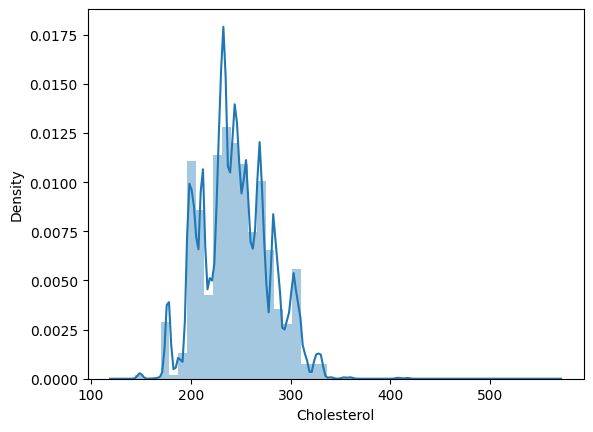

In [31]:
sns.distplot(train_df['Cholesterol'])

C:\Users\karan\AppData\Local\Temp\ipykernel_12600\4038771224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['Cholesterol']))


<Axes: xlabel='Cholesterol', ylabel='Density'>

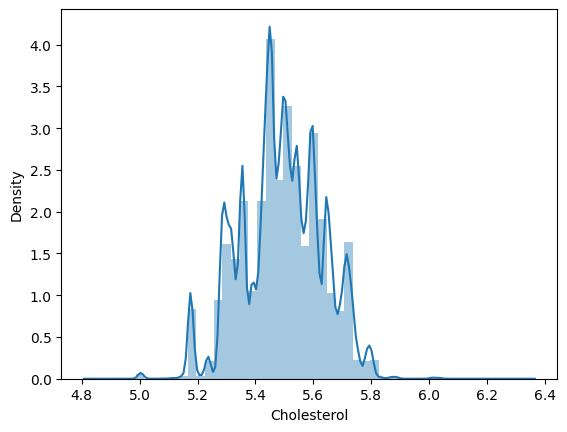

In [32]:
sns.distplot(np.log(train_df['Cholesterol']))

In [33]:
df=train_df.copy()

In [34]:
df=df[df['Cholesterol']<450]

In [35]:
df=df[df['Cholesterol']>145]

C:\Users\karan\AppData\Local\Temp\ipykernel_12600\2025242127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Cholesterol']))


<Axes: xlabel='Cholesterol', ylabel='Density'>

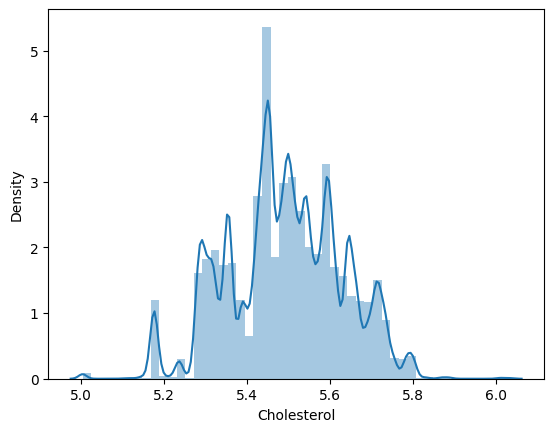

In [36]:
sns.distplot(np.log(df['Cholesterol']))

<Axes: ylabel='Cholesterol'>

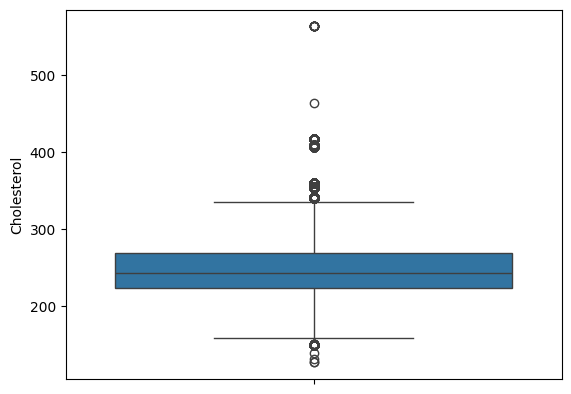

In [37]:
sns.boxplot(train_df['Cholesterol'])

In [38]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
436962,436962,57,1,4,112,226,0,2,132,1,2.8,2,0,7,Presence


In [39]:
train_df[train_df['Cholesterol']<145]

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
297554,297554,57,0,3,125,138,0,2,180,0,0.6,1,0,3,Absence
425396,425396,52,1,4,120,130,0,2,111,0,2.0,2,3,3,Presence
487103,487103,45,1,4,120,126,0,2,105,0,0.0,1,1,7,Presence
589238,589238,43,1,4,120,126,0,2,142,0,0.0,1,1,3,Absence


In [40]:
train_df[train_df['Cholesterol']>450]['Heart Disease'].value_counts()

Heart Disease
Absence     8
Presence    3
Name: count, dtype: int64

observation:
1. the sd of the data is 33 indecating right skweed data 
2. the  IQR range lies betwen 223-269 
3. the data above the wisker point can be considder as potential outlieres 
4. the value 240 is most occuring  in the data 

FBS over 120

In [41]:
train_df['FBS over 120'].value_counts()

FBS over 120
0    579608
1     50392
Name: count, dtype: int64

In [42]:
train_df=train_df.rename(columns={'FBS over 120':'diabetic'})

In [43]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
289058,289058,58,1,3,120,197,0,0,122,0,1.8,2,1,3,Presence


<Axes: xlabel='diabetic'>

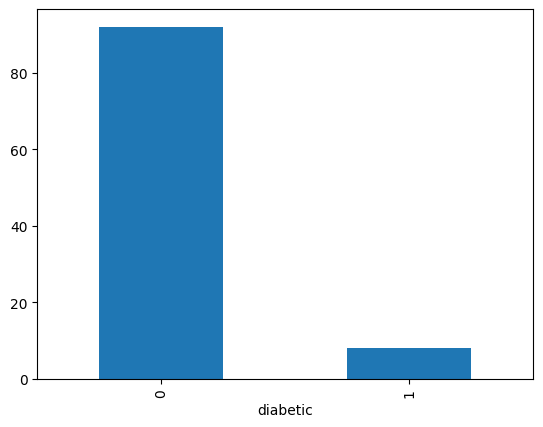

In [44]:
(train_df['diabetic'].value_counts(normalize=True)*100).plot(kind='bar')

In [45]:
train_df[train_df['diabetic']==1]['Heart Disease'].value_counts()

Heart Disease
Presence    25446
Absence     24946
Name: count, dtype: int64

observation:
1. ther is more number of data who doesnt have diabetes 
2. the non diabetes patinat cover almost 90 percent of the data 
3. fbs stand for fasting blood pressure 

In [46]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
335991,335991,35,1,4,118,204,0,0,160,1,2.8,2,0,7,Presence


EKG results

In [47]:
train_df['EKG results'].value_counts()

EKG results
0    320116
2    308562
1      1322
Name: count, dtype: int64

Resting electrocardiogram results:
❤️ 0 = Normal
⚠️ 1 = ST-T wave abnormality
💥 2 = Left ventricular hypertrophy

<Axes: xlabel='EKG results'>

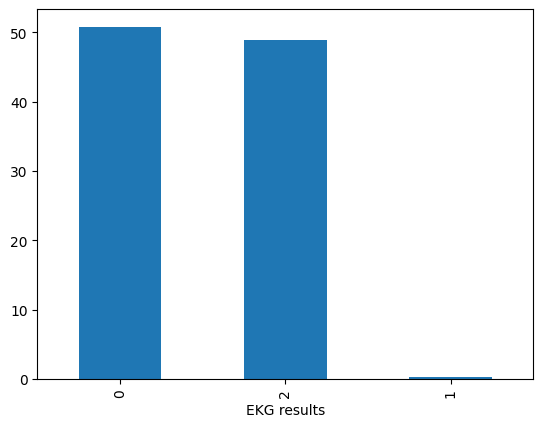

In [48]:
(train_df['EKG results'].value_counts(normalize=True)*100).plot(kind='bar')

In [49]:
train_df[train_df['EKG results']==0]['Heart Disease'].value_counts()

Heart Disease
Absence     210797
Presence    109319
Name: count, dtype: int64

observation:
1. the data has no null values 
2. the 0 indicating normal have absent cases of hearth deases
3. the data 2 indicate high riskh but a sin the data it does not have such huge impact onthe data 
4. the least number of data is present of he number 1


In [50]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
503718,503718,57,1,2,130,228,0,0,171,0,0.0,1,0,3,Absence


Max hr(maximum hearth rate)

In [51]:
train_df['Max HR'].describe()

count    630000.000000
mean        152.816763
std          19.112927
min          71.000000
25%         142.000000
50%         157.000000
75%         166.000000
max         202.000000
Name: Max HR, dtype: float64

In [52]:
train_df['Max HR'].nunique()

93

<Axes: xlabel='Max HR', ylabel='Count'>

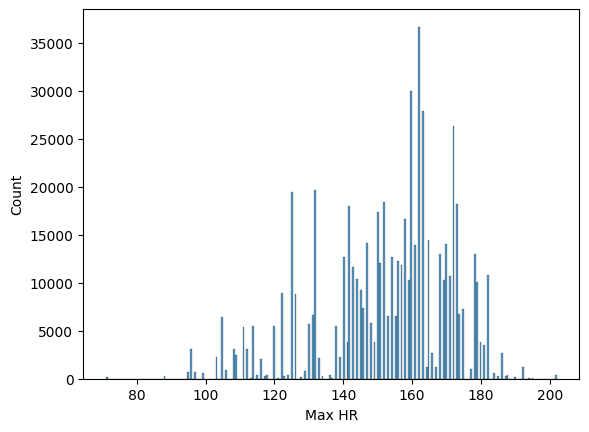

In [53]:
sns.histplot(train_df['Max HR'])

<Axes: xlabel='Max HR'>

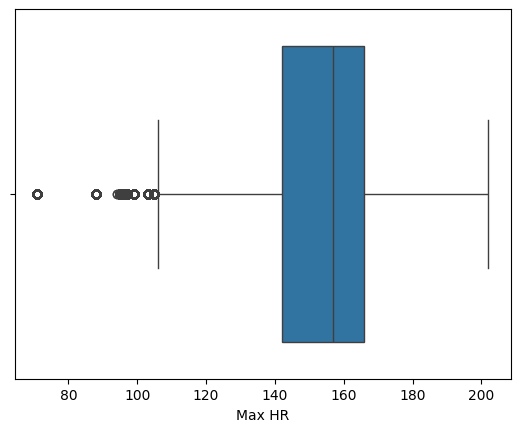

In [54]:
sns.boxplot(x=train_df['Max HR'])

In [55]:
train_df.sample(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
228683,228683,59,1,4,130,249,0,0,186,0,0.6,1,0,3,Absence
523610,523610,56,1,4,152,201,0,2,97,1,1.8,2,2,7,Presence
253595,253595,56,1,4,122,177,0,0,151,0,1.0,1,0,3,Absence
161152,161152,58,0,3,132,177,0,2,161,0,0.0,1,0,3,Absence


the main idea of calculating maximum heart rate 
is 
1. 220-age

In [56]:
train_df[train_df['Max HR']<120]['Heart Disease'].value_counts()

Heart Disease
Presence    33708
Absence      4291
Name: count, dtype: int64

In [57]:
train_df[train_df['Max HR']>190]['Heart Disease'].value_counts()

Heart Disease
Absence     1752
Presence      22
Name: count, dtype: int64

observation:
1. tere is no null value in the data 
2. the iqr range lies btweenn 142 -166
3. the accurence of heart diese id more likly to be on people with low max hr <120
4. there are distinct valie in the data 
5. increse in the number of max hr reduce the risk of hearth dieses
6. the value above the wisker can be consider as the potential outliers in the data 

In [58]:
train_df.sample(4)

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
172434,172434,41,0,4,135,277,1,2,157,0,0.0,2,1,3,Absence
608318,608318,42,1,4,140,201,0,0,161,0,0.0,1,0,3,Absence
324729,324729,64,1,2,104,240,0,2,156,0,0.8,2,0,3,Absence
87184,87184,48,0,2,110,239,0,0,147,0,0.0,1,0,3,Absence


Exercise angina

In [59]:
train_df['Exercise angina'].value_counts()

Exercise angina
0    457553
1    172447
Name: count, dtype: int64

<Axes: xlabel='Exercise angina'>

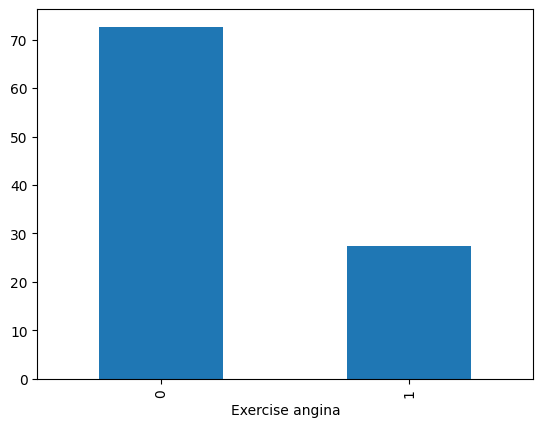

In [60]:
(train_df['Exercise angina'].value_counts(normalize=True)*100).plot(kind='bar')

In [61]:
train_df[train_df['Exercise angina']==1]['Heart Disease'].value_counts()

Heart Disease
Presence    139042
Absence      33405
Name: count, dtype: int64

observartion :
1. exercise angine mean sudden pain in the chest area 
2. the number of 0 are more as compare to 1 in the dat a
3. the 1 plays an import role in classsifing the data yes heart dieses


In [62]:
train_df.sample(3)

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
321163,321163,64,1,4,140,249,0,2,140,0,0.0,2,2,3,Presence
74627,74627,47,0,4,120,309,0,2,132,0,0.0,1,1,7,Presence
459569,459569,69,0,2,130,229,0,0,150,1,0.0,1,0,3,Absence


ST depression
ST segment is abnormally low below the baseline.

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   diabetic                 630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [64]:
train_df['ST depression'].describe()

count    630000.000000
mean          0.716028
std           0.948472
min           0.000000
25%           0.000000
50%           0.100000
75%           1.400000
max           6.200000
Name: ST depression, dtype: float64

In [65]:
train_df['ST depression'].value_counts()

ST depression
0.00    314939
1.20     29269
1.00     28647
1.60     28395
1.40     27146
1.80     21511
0.60     20722
0.20     20474
2.00     17050
0.80     16644
0.40     13073
2.60     10331
2.20      8779
1.50      6965
0.10      6862
2.40      6109
0.50      5627
3.00      5466
2.80      4921
1.90      4657
0.90      3996
3.60      3447
3.20      3160
1.10      2704
2.50      2214
3.40      2210
1.30      2100
0.30      2088
4.00      1559
3.80      1278
2.90      1087
2.10       974
3.50       811
2.30       746
4.20       714
4.60       670
3.10       394
4.40       312
3.30       287
3.90       259
4.80       226
1.70       212
0.70       188
4.50       153
5.00       105
4.10        84
6.00        80
2.70        63
4.90        54
4.30        38
5.20        38
6.20        35
5.60        25
5.40        22
3.70        17
5.80        17
0.64        10
6.10         8
5.50         8
1.64         7
5.30         4
4.70         4
5.10         2
2.12         1
5.90         1
0.06       

In [66]:
train_df['ST depression'].nunique()

66

<Axes: xlabel='ST depression', ylabel='Count'>

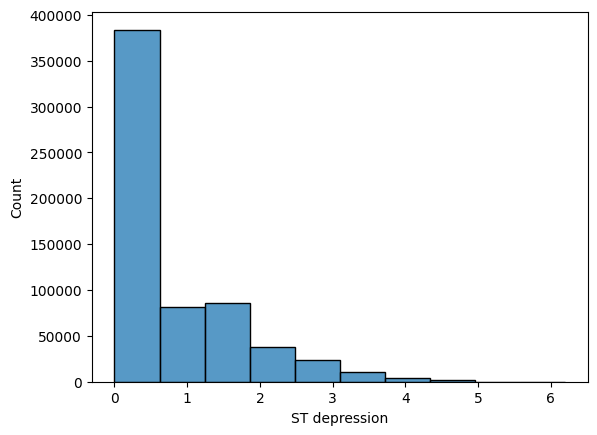

In [67]:
sns.histplot(train_df['ST depression'],bins=10)

<Axes: ylabel='ST depression'>

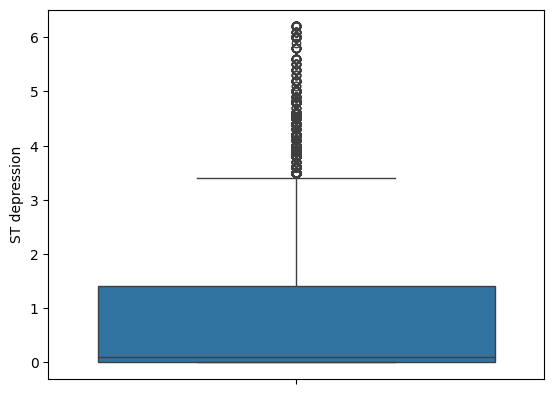

In [68]:
sns.boxplot(train_df['ST depression'])

In [69]:
train_df[train_df['ST depression']>4]['Heart Disease'].value_counts()

Heart Disease
Presence    2461
Absence      139
Name: count, dtype: int64

observation:
1. the st depression mea the difrence btweent the low and baseline 
2. the data with value above 4 have more chance of having hd
3. there are many points which are atached to 0.0 meaning no diffrecne in the line 
4. the iqr lies btwenn 0 to 1.3 ~


In [70]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
304027,304027,57,0,3,130,204,0,0,131,1,1.8,1,0,7,Presence


slope of st

In [71]:
train_df['Slope of ST'].value_counts()

Slope of ST
1    358293
2    256215
3     15492
Name: count, dtype: int64

<Axes: xlabel='Slope of ST'>

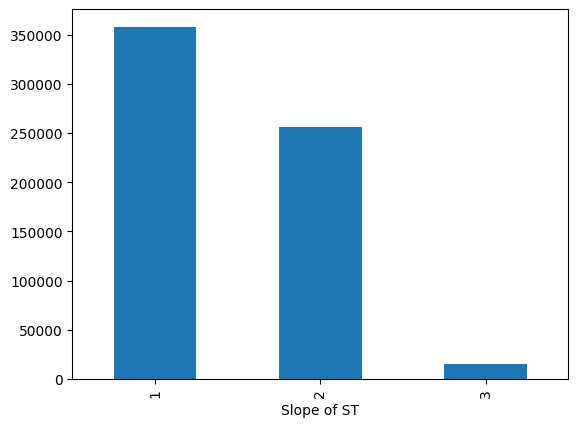

In [72]:
train_df['Slope of ST'].value_counts().plot(kind='bar')

In [73]:
train_df[train_df['Slope of ST']==2]['Heart Disease'].value_counts()

Heart Disease
Presence    177318
Absence      78897
Name: count, dtype: int64

observation:
1. the data  is divided into 3 parts 1,2,3
2. were the 1 has most of the value absent and the vale 2 and 3 have more value in present 
3. there are more number of 1 followed by 2 and 3

In [74]:
train_df.sample()

,id,Age,Sex,Chest pain type,BP,Cholesterol,diabetic,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
530619,530619,62,1,3,120,234,0,0,163,0,1.4,1,0,3,Absence


Thallium

In [75]:
train_df['Thallium'].value_counts()

Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64

<Axes: xlabel='Thallium'>

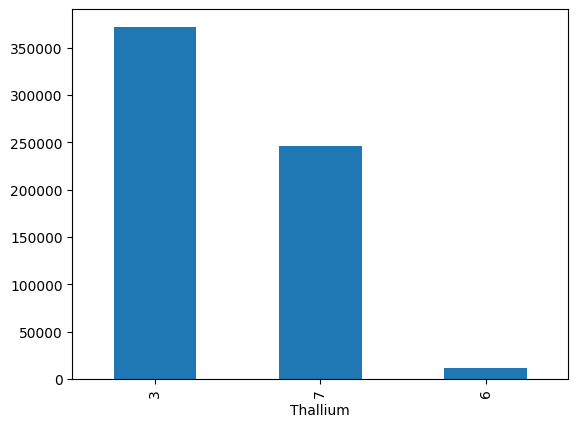

In [76]:
train_df['Thallium'].value_counts().plot(kind='bar')

In [77]:
train_df[train_df['Thallium']==7]['Heart Disease'].value_counts()

Heart Disease
Presence    201196
Absence      45552
Name: count, dtype: int64

observation :
1. the data is divide into 3 type ,3,6,9
2. the data 3 has more absent data were as the 7 have most of the data as present
3. the number of 3 is more as compare to other types


Heart Disease

In [78]:
train_df['Heart Disease'].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

<Axes: xlabel='Heart Disease'>

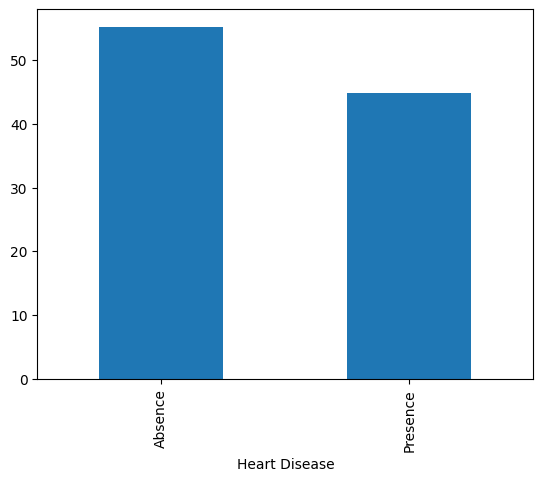

In [79]:
(train_df['Heart Disease'].value_counts(normalize=True)*100).plot(kind='bar')

observation:
1. the data absent have more 55% and 45 % of present data 